In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import minpy.numpy as np
from scipy.stats import norm as gaussian

In [19]:
X = np.random.normal(0, 1, (10000, 512))
# D = [3072, 1024, 512, 256, 128, 64, 16]
D = (512,) + (512,) * 40
weights = [np.random.normal(0, 1 / float(D[0]) ** 0.5, (D[0], D[1]))]
weights += \
    [np.random.normal(0, 1 / (0.5 * float(D[i])) ** 0.5, (D[i], D[i + 1])) for i in range(1, len(D) - 1)]

In [7]:
activations = { 'ReLU' : lambda inputs : np.maximum(0, inputs) }

1.00155
0.994274
1.00506
0.970163
1.01432
1.03024
1.01543
1.07196
1.12387
1.07658
1.00794
0.905922
0.960189
0.990124
1.05472
1.01302
1.02347
1.04
1.03133
1.17703
1.25723
1.23147
1.25892
1.24863
1.14475
1.13945
1.11634
1.08005
0.988495
0.9355
0.959891
0.918782
0.888811
0.930155
0.984082
1.02334
1.12672
1.19915
1.1508
1.11966


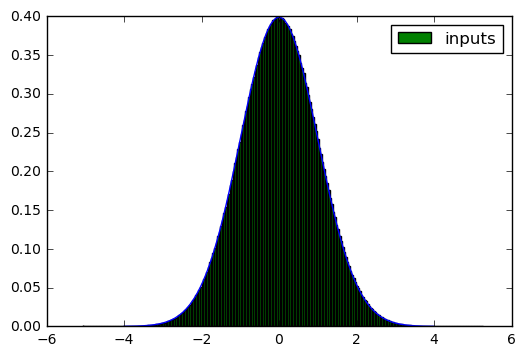

In [20]:
BINS = 256
linespace = np.linspace(-4, 4, 1000).asnumpy()

for key, value in activations.items():
    inputs = X
    pl.plot(linespace, gaussian.pdf(linespace))
    pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True, label='inputs')
    pl.legend()
    for index, W in enumerate(weights):
        inputs = np.dot(inputs, W)
        print np.std(inputs)
#         pl.figure()
#         pl.title('%s layer %d' % (key, index))
#         pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True)
#         pl.plot(linespace, gaussian.pdf(linespace))
        
        inputs = value(inputs)